In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [8]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [16]:
#  we load only needed columns and cast them to suitable data types.
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [10]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [11]:
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

In [12]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [13]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [17]:
# Transpose the frame to see all features at once.
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [18]:
# Examine data types of all features and total dataframe size in memory.
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


In [19]:
# Get basic statistics of each feature.
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


In [20]:
#Count unique Carriers 
flights_df['UniqueCarrier'].nunique()

20

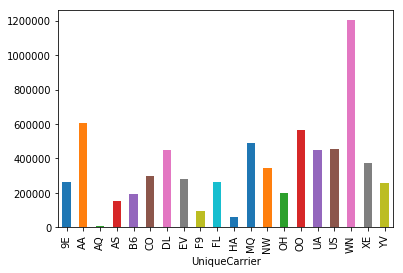

In [50]:
#  plot their relative share of flights:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar')

In [23]:
# We can also group by category/categories in order to calculate different aggregated statistics.
# For example, finding top-3 flight codes, that have the largest total distance traveled in year 2008.

flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

In [31]:
tmp = flights_df.groupby(['UniqueCarrier','FlightNum'])

In [32]:
tmp['Distance']

In [30]:
tmp['Distance'].sum().sort_values(ascending=False)

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
AA             283          1777332.0
UA             44           1733556.0
               2            1714552.0
               83           1667656.0
               3            1637170.0
DL             1273         1629724.0
AA             267          1621416.0
UA             34           1613406.0
AA             297          1611342.0
UA             74           1605787.0
DL             1282         1602712.0
NW             221          1589922.0
DL             1212         1589142.0
UA             68           1559130.0
               84           1534339.0
               1            1531723.0
NW             218          1516371.0
UA             43           1480272.0
US             140          1473913.0
UA             82           1455246.0
NW             222          1454475.0
               217          1453224.0
CO             1         

In [33]:
#Another way:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

In [34]:
# Number of flights by days of week and months:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


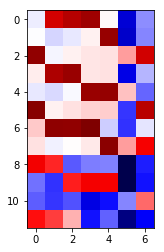

In [35]:
#It can also be handy to color such tables in order to easily notice outliers:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none')


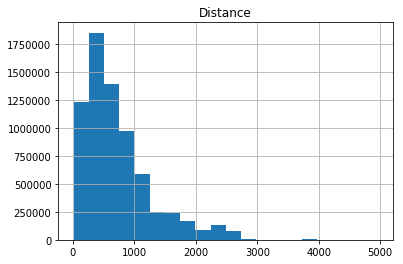

In [37]:
#Flight distance histogram:
flights_df.hist('Distance', bins=20);


In [38]:
#Making a histogram of flight frequency by date.
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [39]:
num_flights_by_date = flights_df.groupby('Date').size()

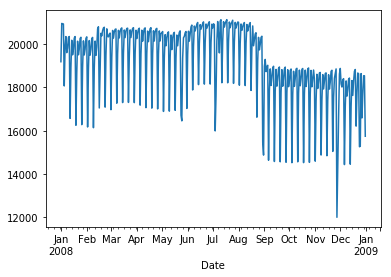

In [40]:
num_flights_by_date.plot();

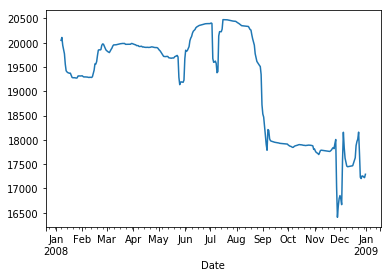

In [41]:
num_flights_by_date.rolling(window=7).mean().plot();

### We'll need a new column in our dataset - departure hour
It is hhmm format, We'll treat departure hour as DepTime // 100
We will get hour 0 and hour 24, we'll set it to be 0 instead
So now values of a new column DepHour will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them.

In [42]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [43]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

#### 1. How many unique carriers are there in our dataset?

 10
 15
 20
 25

In [97]:
#Count unique Carriers 
flights_df['UniqueCarrier'].nunique()

20

#### 2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference? 

 Cancelled overweights completed by 329 flights   
    Completed overweights cancelled by 6734860 flights     
       Cancelled overweights completed by 671 flights    
          Completed overweights cancelled by 11088967 flights

In [98]:
flights_df.groupby('Cancelled').size()

Cancelled
0    6872294
1     137434
dtype: int64

In [99]:
np.subtract(6872294, 137434)

6734860

#### 3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

yes, ATL   
yes, HNL    
yes, MSP   
no


In [375]:
flights_df.groupby(['UniqueCarrier','FlightNum','Dest']).agg({'DepDelay': np.sum})\
.sort_values('DepDelay', ascending=False)\
  .iloc[0:3]

,,,DepDelay
UniqueCarrier,FlightNum,Dest,
AA,613,MIA,22368.0
XE,3053,EWR,22032.0
OO,2874,EWR,20608.0


In [376]:
flights_df.groupby(['UniqueCarrier','FlightNum','Dest'])['ArrDelay'].sum().sort_values(ascending=False)\
  .iloc[0:3]

UniqueCarrier  FlightNum  Dest
B6             527        MCO     20480.0
AA             613        MIA     20160.0
               1639       SJU     19344.0
Name: ArrDelay, dtype: float16

In [350]:
#flights_df[(flights_df['UniqueCarrier'] == 'WN') & (flights_df['FlightNum'] == 50)]['Dest']

In [373]:
flights_df.groupby(['UniqueCarrier','FlightNum', 'Dest']).agg({'ArrDelay': np.sum})\
.sort_values('ArrDelay', ascending=False)\
  .iloc[0:3]

ArrDelay
UniqueCarrier FlightNum Dest          
B6            527       MCO    20480.0
AA            613       MIA    20160.0
              1639      SJU    19344.0

In [371]:
flights_df[(flights_df['UniqueCarrier'] == 'AA') & (flights_df['FlightNum'] == 1555)]['Dest'].value_counts()

SJU    310
MIA    153
Name: Dest, dtype: int64

#### 4. Find the carrier that has the greatest number of cancelled flights.

AA  
MQ  
WN  
CO  

In [69]:
flights_df.groupby(['UniqueCarrier'])['Cancelled'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier
MQ    18331.0
AA    17440.0
OO    12436.0
Name: Cancelled, dtype: float64

#### 5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?

1 am  
5 am  
8 am  
3 pm

In [75]:
flights_df.groupby(['DepHour']).size().sort_values(ascending=False).iloc[:3]

DepHour
8.0     449224
6.0     446737
11.0    444702
dtype: int64

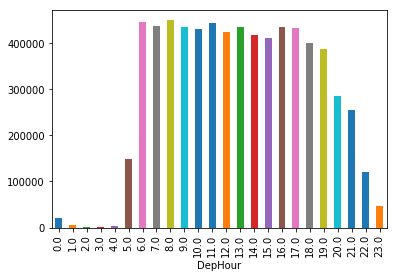

In [76]:
flights_df.groupby(['DepHour']).size().plot(kind='bar')

#### 6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?

2 am  
9 pm  
8 am  
3 am  

In [180]:
flights_df.groupby(['DepHour'])['Cancelled'].sum().sort_values()

DepHour
3.0      0
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
5.0     24
13.0    47
20.0    51
12.0    53
9.0     56
14.0    57
10.0    57
22.0    57
11.0    59
18.0    66
15.0    73
16.0    73
17.0    73
8.0     79
6.0     80
19.0    81
21.0    82
7.0     83
Name: Cancelled, dtype: uint8

In [181]:
flights_df['Cancelled'].sum()

137434

In [91]:
flights_df.groupby(['DepHour'])\
  .agg({'Cancelled': np.sum})\
  .sort_values('Cancelled')

,Cancelled
DepHour,
3.0,0
2.0,1
4.0,1
1.0,4
0.0,7
23.0,24
5.0,24
13.0,47
20.0,51


#### 7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.

3  
19  
22  
4

In [158]:
flights_df.groupby(['DepHour'])['Cancelled'].sum().sort_values()

DepHour
3.0      0
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
5.0     24
13.0    47
20.0    51
12.0    53
9.0     56
14.0    57
10.0    57
22.0    57
11.0    59
18.0    66
15.0    73
16.0    73
17.0    73
8.0     79
6.0     80
19.0    81
21.0    82
7.0     83
Name: Cancelled, dtype: uint8

In [161]:
flights_df[flights_df['DepHour'] >= 0.].groupby(['DepHour'])['Cancelled'].sum().sort_values()

DepHour
3.0      0
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
5.0     24
13.0    47
20.0    51
12.0    53
9.0     56
14.0    57
10.0    57
22.0    57
11.0    59
18.0    66
15.0    73
16.0    73
17.0    73
8.0     79
6.0     80
19.0    81
21.0    82
7.0     83
Name: Cancelled, dtype: uint8

#### 8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

Hint: Consider only completed flights.

4  
7  
8  
17

In [174]:
flights_df.groupby(['DepHour', 'Cancelled']).size().sort_values(ascending=False)

DepHour  Cancelled
8.0      0            449145
6.0      0            446657
11.0     0            444643
7.0      0            436617
13.0     0            435870
9.0      0            434794
16.0     0            433944
17.0     0            432415
10.0     0            431403
12.0     0            424196
14.0     0            416818
15.0     0            411053
18.0     0            400718
19.0     0            387207
20.0     0            285940
21.0     0            254768
5.0      0            148143
22.0     0            119594
23.0     0             46079
0.0      0             20361
1.0      0              5857
4.0      0              3389
2.0      0              1850
3.0      0               833
7.0      1                83
21.0     1                82
19.0     1                81
6.0      1                80
8.0      1                79
17.0     1                73
16.0     1                73
15.0     1                73
18.0     1                66
11.0     1              

#### 9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?

Hint: Consider only completed flights.  

no, there are no such cases  
yes, at 5-6 am  
yes, at 9-10 am  
yes, at 2-4 pm  

In [291]:
# flights_df[['DepHour', 'DepDelay']]

In [186]:
#flights_df.groupby(['DepHour', 'Cancelled']).filter(lambda x: x['Cancelled'] == 0)

In [352]:
flights_df[flights_df['Cancelled'] == 0].groupby(['DepHour'])['DepDelay'].mean()

DepHour
0.0      70.750000
1.0     111.812500
2.0     122.562500
3.0      95.812500
4.0       3.375000
5.0      -4.253906
6.0      -1.629883
7.0       0.102539
8.0       1.760742
9.0       3.753906
10.0      5.460938
11.0      6.683594
12.0      7.902344
13.0      8.812500
14.0     10.351562
15.0     11.875000
16.0     11.882812
17.0     13.210938
18.0     15.343750
19.0     16.875000
20.0     22.781250
21.0     23.031250
22.0     38.031250
23.0     60.000000
Name: DepDelay, dtype: float16

#### 10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

at noon  
at 7 am  
at 8 am  
at 10 am  


In [188]:
flights_df[flights_df['Cancelled'] == 0]['DepHour'].value_counts()

8.0     449145
6.0     446657
11.0    444643
7.0     436617
13.0    435870
9.0     434794
16.0    433944
17.0    432415
10.0    431403
12.0    424196
14.0    416818
15.0    411053
18.0    400718
19.0    387207
20.0    285940
21.0    254768
5.0     148143
22.0    119594
23.0     46079
0.0      20361
1.0       5857
4.0       3389
2.0       1850
3.0        833
Name: DepHour, dtype: int64

#### 11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

Which of the listed below is not in your top-10 list?  

DL  
AA  
OO  
EV  

In [192]:
flights_df[flights_df['Cancelled'] == 0]['UniqueCarrier'].value_counts().iloc[:10]

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

#### 12. Plot distributions of flight cancellation reasons (CancellationCode).

What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)  

Carrier  
Weather conditions  
National Air System  
Security reasons  

In [194]:
flights_df[flights_df['Cancelled'] == 1]['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

#### 13. Which route is the most frequent, in terms of the number of flights?

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)  

New-York – Washington (JFK-IAD)  
San-Francisco – Los-Angeles (SFO-LAX)  
San-Jose – Dallas (SJC-DFW)  
New-York – San-Francisco (JFK-SFO)  

In [201]:
flights_df.groupby(['Origin','Dest']).size().sort_values(ascending=False).iloc[:3]

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
dtype: int64

#### 14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.  

Hint: consider only positive delays  

449  
539  
549  
668  


In [280]:
flights_df['WeatherDelay'] = flights_df['WeatherDelay'].fillna(0)
flights_df['WeatherDelay'].value_counts()
#flights_df['DepDelay'] 
# flights_df[(flights_df['WeatherDelay'] > 0.0) & (flights_df['DepDelay'] > 0)].groupby(['Origin','Dest']).\
#                size().sort_values(ascending=False).iloc[:5]
flights_count_pos = flights_df[flights_df['DepDelay'] > 0].groupby(['Origin','Dest'])['DepDelay']\
         .count().sort_values(ascending=False)[:5]
flights_count_pos 

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
Name: DepDelay, dtype: int64

In [282]:
Origin = ["LAX", "DAL", "SFO", "ORD", "HOU"] 
Dest = ["SFO", "HOU", "LAX", "LGA", "DAL"] 
  
# using zip() to map values 
mapped = list(zip(Origin, Dest))
mapped

[('LAX', 'SFO'),
 ('DAL', 'HOU'),
 ('SFO', 'LAX'),
 ('ORD', 'LGA'),
 ('HOU', 'DAL')]

In [ ]:
df.isin({'num_wings': [0, 3]})

In [290]:
flights_df[(flights_df['WeatherDelay'] > 0.0) & (flights_df['DepDelay'] > 0)]\
                                                 .groupby(['Origin', 'Dest'])['DepDelay'].count().loc[mapped].sum()

668

#### 15. Examine the hourly distribution of departure times. Choose all correct statements:  
  
Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).  
Flights are uniformly distributed within time interval [0-23].   
In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.  

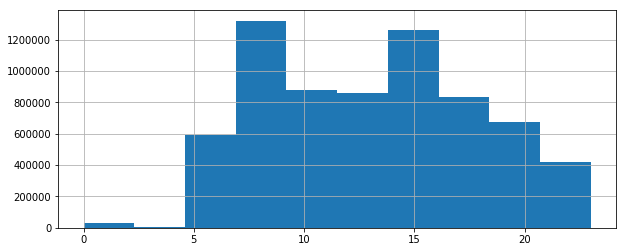

In [292]:
flights_df['DepHour'].hist(figsize=(10, 4));

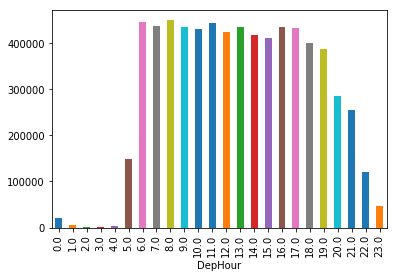

In [300]:
flights_df.groupby('DepHour').size().plot(kind='bar');

In [294]:
flights_df['DepHour'].value_counts()

8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
22.0    119651
23.0     46103
0.0      20368
1.0       5861
4.0       3390
2.0       1851
3.0        833
Name: DepHour, dtype: int64

#### 16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.  
 
Choose all correct statements:  

The number of flights during weekends is less than during weekdays (working days).  
The lowest number of flights is on Sunday.  
There are less flights during winter than during summer.  
Hint: Look for official meteorological winter months for the Northern Hemisphere.  

In [296]:
# DayOfWeek
flights_df['DayOfWeek'].value_counts().sort_values(ascending=False)

3    1039665
1    1036201
5    1035166
4    1032224
2    1032049
7     976887
6     857536
Name: DayOfWeek, dtype: int64

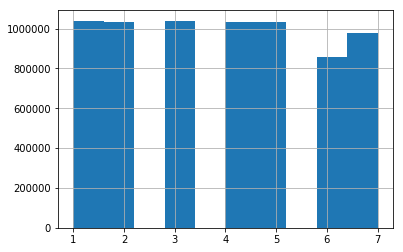

In [298]:
flights_df['DayOfWeek'].hist();

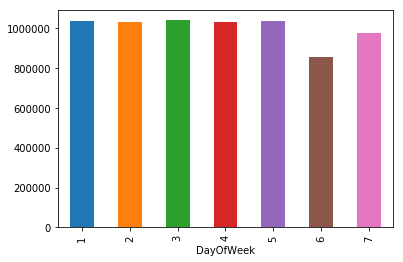

In [299]:
flights_df.groupby('DayOfWeek').size().plot(kind='bar');

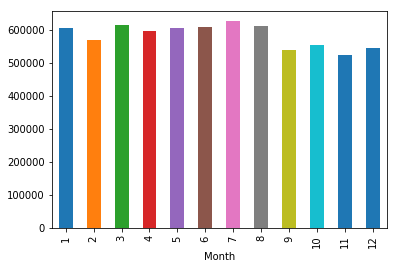

In [301]:
# Month
flights_df.groupby('Month').size().plot(kind='bar');

In [302]:
flights_df['Month'].value_counts().sort_values(ascending=False)

7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: Month, dtype: int64

#### 17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.  

Choose all correct statements:  

October has the lowest number of cancellations due to weather.  (no)  
The highest number of cancellations in September is due to Security reasons.  (no)  
April's top cancellation reason is carriers.  (yes)  
Flights cancellations due to National Air System are more frequent than those due to carriers. (no)

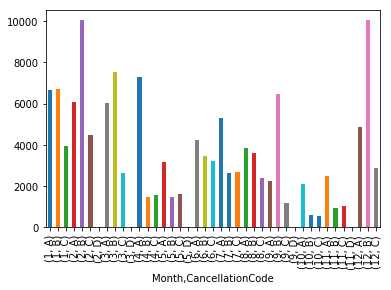

In [309]:
flights_df.groupby(['Month', 'CancellationCode']).size().plot(kind='bar', width=0.5);

In [315]:
flights_df.groupby(['Month', 'CancellationCode']).size()

Month  CancellationCode
1      A                    6635
       B                    6711
       C                    3962
2      A                    6090
       B                   10034
       C                    4470
       D                       2
3      A                    6038
       B                    7520
       C                    2621
       D                       4
4      A                    7312
       B                    1479
       C                    1564
5      A                    3157
       B                    1461
       C                    1608
       D                       3
6      A                    4251
       B                    3448
       C                    3232
7      A                    5292
       B                    2612
       C                    2694
8      A                    3852
       B                    3582
       C                    2401
9      A                    2246
       B                    6478
       C           

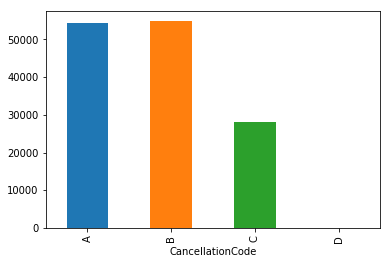

In [316]:
flights_df.groupby(['CancellationCode']).size().plot(kind='bar')

#### 18. Which month has the greatest number of cancellations due to Carrier?  

May  
January  
September  
April  

In [318]:
flights_df[flights_df['CancellationCode'] == 'A'].groupby(['Month']).size().sort_values(ascending=False)

Month
4     7312
1     6635
2     6090
3     6038
7     5292
12    4850
6     4251
8     3852
5     3157
11    2510
9     2246
10    2097
dtype: int64

#### 19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.  

9E  
EV  
HA  
AA  

In [329]:
flights_df[(flights_df['CancellationCode'] == 'A') & (flights_df['Month'] == 4)].\
        groupby(['UniqueCarrier']).size().sort_values(ascending=False).iloc[:3]

UniqueCarrier
AA    3696
WN     533
UA     494
dtype: int64

#### 20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). (Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).  

EV  
OO  
AA  
AQ  


In [340]:
df_filter = flights_df[(flights_df['ArrDelay'] >= 0) &\
                       (flights_df['DepDelay'] >= 0)]
# df_filter['ArrDelay']

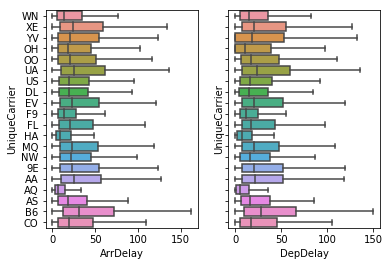

In [344]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(y="UniqueCarrier", x="ArrDelay", 
            data=df_filter, orient="h", ax=axes[0], showfliers=False);

sns.boxplot(y="UniqueCarrier", x="DepDelay", 
            data=df_filter, orient="h", ax=axes[1], showfliers=False);